# Proyect 2

### Imports

In [1]:
# Make imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# download word packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Cleaning

In [2]:
# Lectura del archivo
datos = pd.read_csv('spam-2.csv', encoding='iso-8859-2')
# Get just the columns that has some values
datos = datos[["v1", "v2"]]
# Rename columns
datos = datos.rename(columns={"v1": "category", "v2": "message"})
# Convert to minus letters and filter not character
datos["message"] = datos["message"].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x.lower()))
# Get the words splitted with the tokenize function
datos["words"] = datos["message"].apply(lambda x: nltk.tokenize.word_tokenize(x))
# Get the amount of words per message
datos["amountWords"] = datos["words"].apply(lambda x: len(x))
datos["amountCharacters"] = datos["message"].apply(lambda x: len(x))
datos.head()

,category,message,words,amountWords,amountCharacters
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20,102
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6,23
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25,124
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11,43
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13,59


### Delete tokens with any symbol that is not a character

In [3]:
datos["words"] = datos["words"].apply(lambda x: [word for word in x if not re.search(r'(\W+)', word)])
datos

,category,message,words,amountWords,amountCharacters
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20,102
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6,23
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25,124
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11,43
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13,59
...,...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[this, is, the, nd, time, we, have, tried, con...",26,130
5568,ham,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]",7,34
5569,ham,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...",9,50
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...",26,124


### Delete Stop Words

In [4]:
stop = nltk.corpus.stopwords.words('english')
datos["words"] = datos["words"].apply(lambda x: [word for word in x if word not in (stop)])
datos

,category,message,words,amountWords,amountCharacters
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",20,102
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6,23
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,...",25,124
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",11,43
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...",13,59
...,...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[nd, time, tried, contact, u, u, pound, prize,...",26,130
5568,ham,will b going to esplanade fr home,"[b, going, esplanade, fr, home]",7,34
5569,ham,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]",9,50
5570,ham,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...",26,124


## Exploratory Analysis

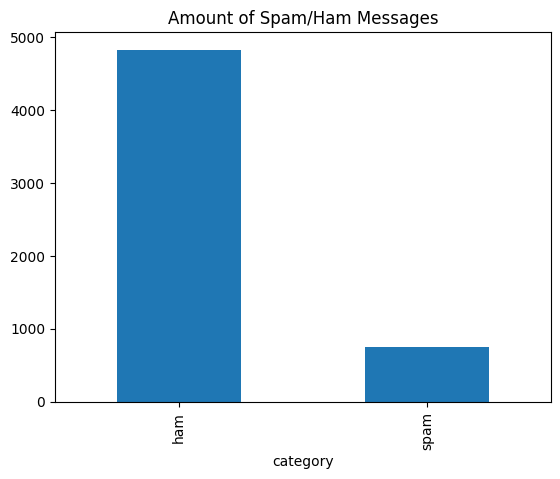

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ham,4825.0,13.810570,11.047508,0.0,7.0,10.0,18.0,171.0
spam,747.0,21.172691,5.479761,1.0,19.0,22.0,25.0,32.0


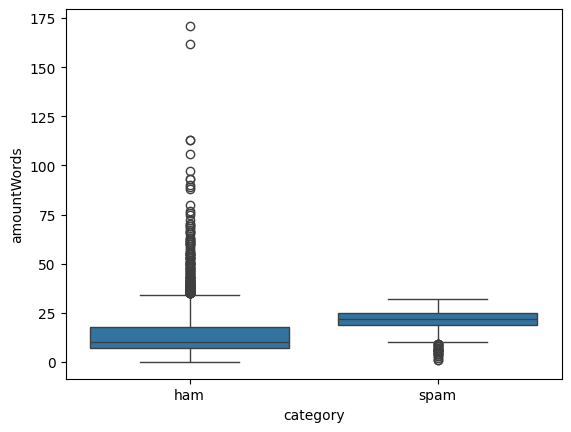

In [5]:
# Amount of ham and spam
datos.groupby(["category"])["category"].count().plot(kind = 'bar')
plt.title("Amount of Spam/Ham Messages")
plt.show()
# plot amount of words by ham or spam
sns.boxplot(x="category", y="amountWords", data=datos)
datos.groupby(["category"])["amountWords"].describe()

<Axes: xlabel='category', ylabel='amountCharacters'>

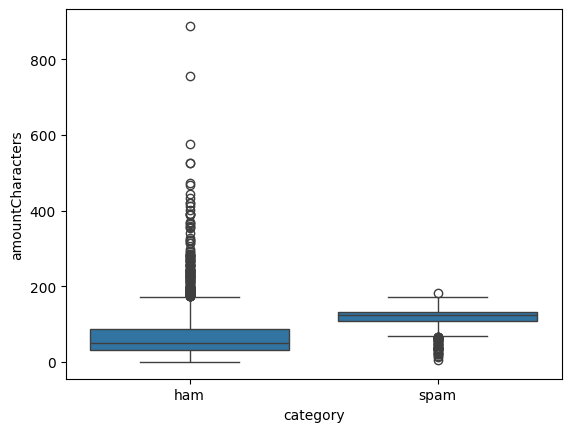

In [6]:
sns.boxplot(x="category", y="amountCharacters", data=datos)

## Model

### Divide between train & test

In [7]:
train, test = train_test_split(datos.copy(), test_size=0.30, stratify=datos['category'], random_state=42)
train.head()
test.head()

,category,message,words,amountWords,amountCharacters
159,spam,you are a winner u have been specially selecte...,"[winner, u, specially, selected, receive, cash...",22,121
1691,ham,i dont know but im raping dudes at poker,"[dont, know, im, raping, dudes, poker]",9,40
4645,spam,we tried to contact you re your reply to our o...,"[tried, contact, reply, offer, video, phone, a...",27,141
5090,ham,st andre virgils cream,"[st, andre, virgils, cream]",4,22
2286,ham,i have had two more letters from i will copy ...,"[two, letters, copy, cos, one, message, speak,...",22,99


### Lemmatization

In [8]:
lemmatizer = nltk.stem.WordNetLemmatizer()
train["words"] = train["words"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train

,category,message,words,amountWords,amountCharacters
4912,spam,goal arsenal henry v liverpool henry scores...,"[goal, arsenal, henry, v, liverpool, henry, sc...",26,144
2541,ham,i dont can you send it to me plus hows mode,"[dont, send, plus, hows, mode]",11,43
5323,ham,aah bless hows your arm,"[aah, bless, hows, arm]",5,23
5171,ham,oh k i will come tomorrow,"[oh, k, come, tomorrow]",6,26
2532,ham,yup ok,"[yup, ok]",2,6
...,...,...,...,...,...
3185,ham,happy birthday to youdearwith lots of loverakh...,"[happy, birthday, youdearwith, lot, loverakhes...",8,53
607,ham,what i meant to say is cant wait to see u agai...,"[meant, say, cant, wait, see, u, getting, bore...",18,87
552,ham,sure if i get an acknowledgement from you that...,"[sure, get, acknowledgement, astoundingly, tac...",21,118
763,ham,nothing but we jus tot u would ask cos u ba gu...,"[nothing, jus, tot, u, would, ask, co, u, ba, ...",32,139


### Stemming

In [9]:
ps = nltk.stem.PorterStemmer()
train["words"] = train["words"].apply(lambda x: [ps.stem(word) for word in x])
train

,category,message,words,amountWords,amountCharacters
4912,spam,goal arsenal henry v liverpool henry scores...,"[goal, arsen, henri, v, liverpool, henri, scor...",26,144
2541,ham,i dont can you send it to me plus hows mode,"[dont, send, plu, how, mode]",11,43
5323,ham,aah bless hows your arm,"[aah, bless, how, arm]",5,23
5171,ham,oh k i will come tomorrow,"[oh, k, come, tomorrow]",6,26
2532,ham,yup ok,"[yup, ok]",2,6
...,...,...,...,...,...
3185,ham,happy birthday to youdearwith lots of loverakh...,"[happi, birthday, youdearwith, lot, loverakhes...",8,53
607,ham,what i meant to say is cant wait to see u agai...,"[meant, say, cant, wait, see, u, get, bore, br...",18,87
552,ham,sure if i get an acknowledgement from you that...,"[sure, get, acknowledg, astoundingli, tactless...",21,118
763,ham,nothing but we jus tot u would ask cos u ba gu...,"[noth, ju, tot, u, would, ask, co, u, ba, gua,...",32,139


### Dictionaries

In [10]:
spamDictionary = {}
hamDictionary = {}
for x in range(0, train.count()[0]):
    # Convert to a set to avoid duplicates because we want to count if it shows up in the text not how many times does it shows up
    wordsNotDuplicated = train.iloc[x].iloc[2]
    isSpamOrHam = train.iloc[x].iloc[0]
    for word in wordsNotDuplicated:
        if word not in list(hamDictionary.keys()):
            hamDictionary[word]=0
        if word not in list(spamDictionary.keys()):
            spamDictionary[word]=0
        if isSpamOrHam=='ham':
            hamDictionary[word]+=1
        else:
            spamDictionary[word]+=1

/tmp/ipykernel_17072/715581307.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for x in range(0, train.count()[0]):


### Top Words in Spam

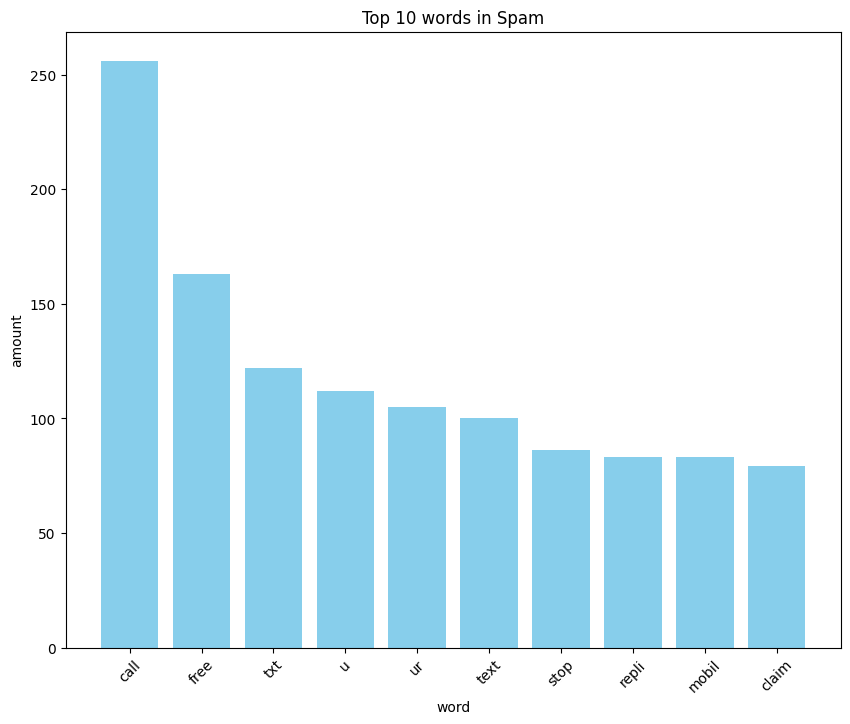

In [11]:
sorted_spam_words = sorted(spamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_spam_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Spam')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Top Words in Ham

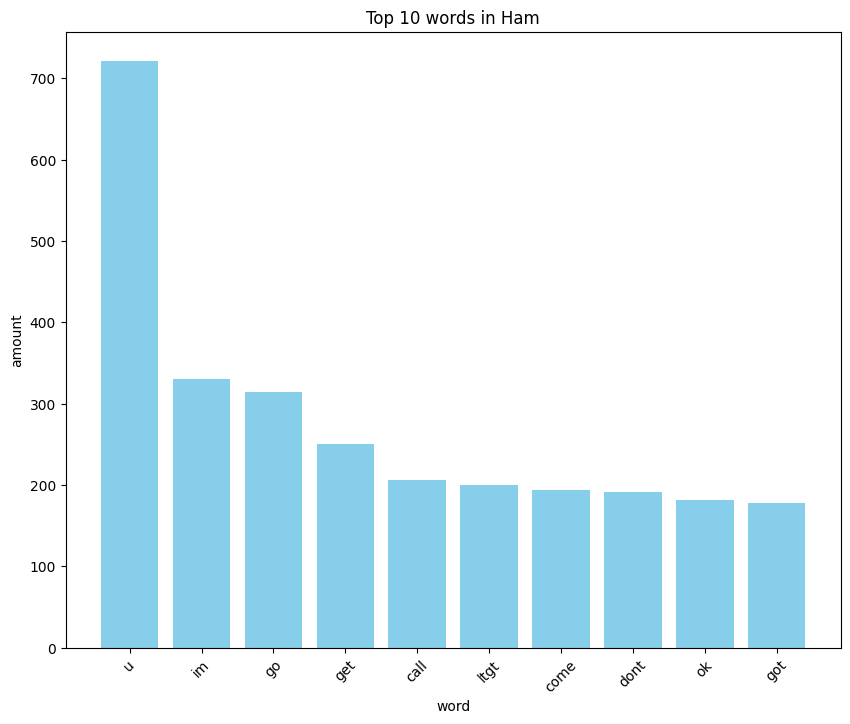

In [12]:
sorted_ham_words = sorted(hamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_ham_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Ham')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Probability calculus

In [13]:
# Probability that a text is a ham/spam
pHam = train[train["category"]=='ham']['category'].count()/train['category'].count()
pSpam = train[train["category"]=='spam']['category'].count()/train['category'].count()
# Dictionary for probabilities that a text is a Spam/Ham given a word
pTextGivenWord = {}
# Probabilities for a word
for key in list(hamDictionary.keys()):
    # Probability that a word shows up in ham given is ham
    pWH = hamDictionary[key]/pHam
    # Probability that a word shows up in spma given is spam
    pWS = spamDictionary[key]/pSpam
    # Probability that is spam given a word
    pTextGivenWord[key] = pWS*pSpam/(pWH*pHam+pWS*pSpam)
for word in list(pTextGivenWord.keys()):
    print(word+": "+str(pTextGivenWord[word]))

goal: 0.75
arsen: 1.0
henri: 1.0
v: 0.125
liverpool: 1.0
score: 0.4
simpl: 0.08333333333333333
shot: 0.5
yard: 1.0
pa: 0.2
bergkamp: 1.0
give: 0.0875
margin: 1.0
min: 0.5820895522388061
dont: 0.07692307692307693
send: 0.35664335664335667
plu: 0.35
how: 0.0
mode: 0.0
aah: 0.0
bless: 0.0
arm: 0.0
oh: 0.012345679012345678
k: 0.16363636363636364
come: 0.02512562814070352
tomorrow: 0.07692307692307693
yup: 0.0
ok: 0.021505376344086023
need: 0.06349206349206349
stop: 0.7350427350427351
go: 0.07917888563049853
bed: 0.0
make: 0.056818181818181816
fuck: 0.0
deal: 0.1
want: 0.12021857923497267
new: 0.53125
video: 0.9130434782608695
phone: 0.42
anytim: 0.8571428571428571
network: 0.8
inclus: 1.0
call: 0.5541125541125541
download: 0.35714285714285715
per: 0.813953488372093
week: 0.4186046511627907
free: 0.7990196078431373
deltomorrow: 1.0
repli: 0.7217391304347827
hey: 0.02666666666666667
leav: 0.023255813953488372
friday: 0.0
wait: 0.18666666666666668
ask: 0.04597701149425287
superior: 0.0
tell: 

### Function to calculate a probability given a word

In [14]:
def probabilityGivenAWord(word):
    if word in list(pTextGivenWord.keys()):
        return pTextGivenWord[word]
    else:
        return 0
print(probabilityGivenAWord("u"))

0.13445378151260504


### Function to calculate a probability given a text

In [15]:
def probabilityGivenText(text):
    keys = list(spamDictionary.keys())
    if type(text)!= list:
        # Tokenize & clean text
        text = nltk.tokenize.word_tokenize(re.sub(r'[^a-zA-Z ]', '', text.lower()))
    numerator = 1
    denominator = 1
    pW = 0
    for word in text:
        # Ignore not existing words in database
        if word in keys and spamDictionary[word]!=0.0:
            pW = probabilityGivenAWord(word)
            numerator *= pW
            denominator *= (1-pW)
    denominator += numerator
    return numerator/denominator if denominator != 0 else 0

## Pruebas de Rendimiento

In [16]:
train["Prediction"] = train["words"].apply(lambda text: probabilityGivenText(text))
train

,category,message,words,amountWords,amountCharacters,Prediction
4912,spam,goal arsenal henry v liverpool henry scores...,"[goal, arsen, henri, v, liverpool, henri, scor...",26,144,1.000000e+00
2541,ham,i dont can you send it to me plus hows mode,"[dont, send, plu, how, mode]",11,43,2.427085e-02
5323,ham,aah bless hows your arm,"[aah, bless, how, arm]",5,23,5.000000e-01
5171,ham,oh k i will come tomorrow,"[oh, k, come, tomorrow]",6,26,5.252662e-06
2532,ham,yup ok,"[yup, ok]",2,6,2.150538e-02
...,...,...,...,...,...,...
3185,ham,happy birthday to youdearwith lots of loverakh...,"[happi, birthday, youdearwith, lot, loverakhes...",8,53,2.898467e-05
607,ham,what i meant to say is cant wait to see u agai...,"[meant, say, cant, wait, see, u, get, bore, br...",18,87,7.346785e-06
552,ham,sure if i get an acknowledgement from you that...,"[sure, get, acknowledg, astoundingli, tactless...",21,118,1.929260e-01
763,ham,nothing but we jus tot u would ask cos u ba gu...,"[noth, ju, tot, u, would, ask, co, u, ba, gua,...",32,139,2.712355e-10


In [23]:
def predictionTest(text):
    originalText = text
    if type(text)!= list:
        # Tokenize & clean text
        text = nltk.tokenize.word_tokenize(re.sub(r'[^a-zA-Z ]', '', text.lower()))
    # Create the response result
    result = {"prediction":"ham"}
    # Get the probability given the text
    result["probability"] = probabilityGivenText(text)
    # Set keys to check if all words are recognized
    keys = list(spamDictionary.keys())
    # In case is bigger than 0.5 => is spam else ham
    if result["probability"]>0.5:
        result["prediction"] = "spam"
    else:
        result["prediction"] = "ham"
    # Get all words unknown and known probabilities
    probabilityByWord = {}
    for word in text:
        if word in keys:
            probabilityByWord[word] = probabilityGivenAWord(word)
        else:
            probabilityByWord[word] = "Unknown Word"
    result["words"] = probabilityByWord
    result["originalText"] = originalText
    return result

In [18]:
test["prediction"] = test["words"].apply(lambda text: predictionTest(text)["prediction"])
test["completePrediction"] = test["words"].apply(lambda text: predictionTest(text))
test

,category,message,words,amountWords,amountCharacters,prediction,completePrediction
159,spam,you are a winner u have been specially selecte...,"[winner, u, specially, selected, receive, cash...",22,121,spam,"{'prediction': 'spam', 'probability': 1.0, 'wo..."
1691,ham,i dont know but im raping dudes at poker,"[dont, know, im, raping, dudes, poker]",9,40,ham,"{'prediction': 'ham', 'probability': 0.0002695..."
4645,spam,we tried to contact you re your reply to our o...,"[tried, contact, reply, offer, video, phone, a...",27,141,spam,"{'prediction': 'spam', 'probability': 1.0, 'wo..."
5090,ham,st andre virgils cream,"[st, andre, virgils, cream]",4,22,ham,"{'prediction': 'ham', 'probability': 0.4864864..."
2286,ham,i have had two more letters from i will copy ...,"[two, letters, copy, cos, one, message, speak,...",22,99,ham,"{'prediction': 'ham', 'probability': 4.4692737..."
...,...,...,...,...,...,...,...
2569,ham,ultimately tor motive tui achieve korli,"[ultimately, tor, motive, tui, achieve, korli]",6,39,ham,"{'prediction': 'ham', 'probability': 0.5, 'wor..."
3972,ham,night night see you tomorrow,"[night, night, see, tomorrow]",5,28,ham,"{'prediction': 'ham', 'probability': 4.5083955..."
1740,spam,ur going bahamas callfreefone and speak to a...,"[ur, going, bahamas, callfreefone, speak, live...",24,125,spam,"{'prediction': 'spam', 'probability': 1.0, 'wo..."
3411,ham,no she didnt i will search online and let you ...,"[didnt, search, online, let, know]",11,50,ham,"{'prediction': 'ham', 'probability': 0.0005575..."


In [19]:
matriz_confusion = confusion_matrix(test["category"], test["prediction"])
print("Matriz de Confusion:")
print(matriz_confusion)

Matriz de Confusion:
[[1379   69]
 [  29  195]]


In [20]:
# Reporte completo
print("\nReporte de Clasificacion:")

print(classification_report(test["category"], test["prediction"]))


Reporte de Clasificacion:
              precision    recall  f1-score   support

         ham       0.98      0.95      0.97      1448
        spam       0.74      0.87      0.80       224

    accuracy                           0.94      1672
   macro avg       0.86      0.91      0.88      1672
weighted avg       0.95      0.94      0.94      1672



## Prueba Final

In [29]:
print(predictionTest(input("Ingrese el mensaje:")))

{'prediction': 'spam', 'probability': 1.0, 'words': {'txt': 0.9384615384615385, 'call': 0.5541125541125541, 'to': 'Unknown Word', 'no': 0.0, 'claim': 1.0, 'your': 0.04878048780487805, 'reward': 0.8888888888888888, 'of': 'Unknown Word', 'hours': 'Unknown Word', 'talk': 0.06382978723404255, 'time': 0.08092485549132948, 'use': 0.1836734693877551, 'from': 'Unknown Word', 'phone': 0.42, 'now': 'Unknown Word'}, 'originalText': 'txt: CALL to no: 86888 & claim your reward of 3 hours talk time to use from your phone now!'}


In [30]:
print(predictionTest(input("Ingrese el mensaje:")))

{'prediction': 'spam', 'probability': 1.0, 'words': {'urgent': 0.9772727272727273, 'your': 0.04878048780487805, 'mobile': 'Unknown Word', 'won': 'Unknown Word', 'a': 'Unknown Word', 'bonus': 'Unknown Word', 'caller': 0.6, 'prize': 1.0, 'on': 'Unknown Word', 'this': 'Unknown Word', 'is': 'Unknown Word', 'the': 'Unknown Word', 'nd': 0.6086956521739131, 'attempt': 0.9166666666666666, 'to': 'Unknown Word', 'reach': 0.08333333333333333, 'you': 'Unknown Word'}, 'originalText': 'URGENT! your mobile won a 2000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU!'}


In [31]:
print(predictionTest(input("Ingrese el mensaje:")))

{'prediction': 'ham', 'probability': 6.225022098828451e-05, 'words': {'i': 'Unknown Word', 'will': 0.25, 'come': 0.02512562814070352, 'tomorrow': 0.07692307692307693, 'di': 0.08}, 'originalText': 'I will come tomorrow di'}


In [32]:
print(predictionTest(input("Ingrese el mensaje:")))

{'prediction': 'ham', 'probability': 0.0076335877862595426, 'words': {'now': 'Unknown Word', 'whats': 'Unknown Word', 'your': 0.04878048780487805, 'house': 'Unknown Word', 'again': 'Unknown Word', 'and': 'Unknown Word', 'do': 'Unknown Word', 'you': 'Unknown Word', 'have': 'Unknown Word', 'any': 'Unknown Word', 'beer': 0.0, 'there': 0.13043478260869565}, 'originalText': 'Now whats your house # again ? and do you have any beer there?'}
